# Fourier-Analyse – Python in der Disco

Dieses Jupyter-Notebook enthält den Quelltext für Kapitel 11 »Fourier-Analyse – Python in der Disco« im Buch [Python für Ingenieure für Dummies](https://python-fuer-ingenieure.de/).

In [1]:
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [2]:
import sys
sys.path.append("../util")
from pfi_util import define_plot_params_rh, show_book, set_cmap_cycler
import matplotlib.pyplot as plt

define_plot_params_rh(plt)
set_cmap_cycler(N=2)

In [3]:
import numpy as np
np.set_printoptions(linewidth=68)
from numpy import pi

### Einführunsbeispiele

(Grafiken fürs Buch)

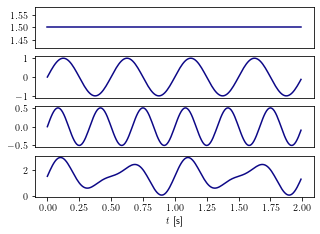

In [4]:
ts = np.arange(0, 2, 1e-2)  # interessant ist, wenn das intervall so ist, dass das signal nicht periodisch wird
y1 = np.ones(len(ts)) * 1.5
y2 = np.sin(2*pi*ts*2)
y3 = 0.5*np.sin(2*pi*ts*3)

plt.figure(figsize=(5, 3.5))
plt.subplot(411)
plt.plot(ts, y1)
plt.xticks([])
plt.subplot(412)
plt.plot(ts, y2)
plt.xticks([])
plt.subplot(413)
plt.plot(ts, y3)
plt.xticks([])
plt.subplot(414)
plt.plot(ts, y1+y2+y3)
plt.xlabel("$t$ [s]")

show_book('introduction')

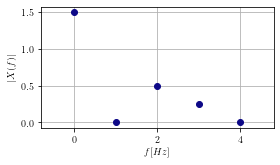

In [5]:
ts = np.arange(0, 1, 1e-2)  # interessant ist, wenn das intervall so ist, dass das signal nicht periodisch wird
ys = np.sin(2*pi*ts*2) + 0.5*np.sin(2*pi*ts*3) + 1.5  # f1 = 2 Hz, f2 = 3 Hz

fs = 10
tk = ts[::10]   # sampling frequency 10 Hz
yk = ys[::10]
n = len(tk)

Yk = np.fft.fft(yk)
Fk = np.fft.fftfreq(n, 1/fs)

plt.figure(figsize=(4, 2.4))
plt.plot(Fk, np.abs(Yk)/10, 'o')
plt.xticks(Fk[::2])
plt.xlim(-0.8, 4.8)
plt.xlabel("$f [Hz]$")
plt.ylabel("$|X(f)|$")
plt.grid()
plt.tight_layout()
show_book('intro_fft')

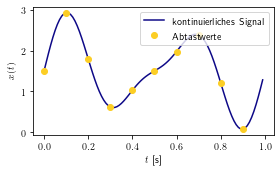

In [6]:
plt.figure(figsize=(4, 2.5))
plt.plot(ts, ys, label='kontinuierliches Signal')
plt.plot(tk, yk, 'o', label='Abtastwerte')
plt.xlabel('$t$ [s]')
plt.ylabel('$x(t)$')
plt.legend()
plt.tight_layout()
show_book('sampling')

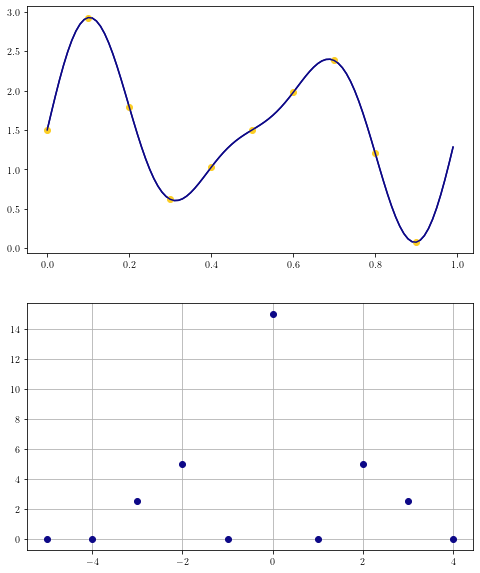

In [7]:
ts = np.arange(0, 1, 1e-2)  # interessant ist, wenn das intervall so ist, dass das signal nicht periodisch wird
ys = np.sin(2*pi*ts*2) + 0.5*np.sin(2*pi*ts*3) + 1.5  # f1 = 2 Hz, f2 = 3 Hz

fs = 10
tk = ts[::10]   # sampling frequency 10 Hz
yk = ys[::10]
n = len(tk)

Yk = np.fft.fft(yk)
Fk = np.fft.fftfreq(n, 1/fs)

abc = np.real(sum(Y*np.exp(2*pi*F*ts*1j)/n for F, Y in zip(Fk, Yk)))


plt.figure(figsize=(8, 10))
plt.subplot(211)
plt.plot(ts, ys)
plt.plot(tk, yk, 'o')
plt.plot(ts, abc)

plt.subplot(212)
plt.plot(Fk, np.abs(Yk), 'o')
plt.xticks(Fk[::2])
plt.grid()
plt.show()

### Diskrete Fourier-Transformation (DFT)

`begin define_signal`

In [12]:
import numpy as np
dt = 0.1  # Samplingzeit Ts = 100 ms
tt = np.arange(0, 2, dt)  # Vektor der Abtastzeiten
# Signal aus 2 überlagerten Sinusschwingungen
# (siehe Anfang des Kapitels)
xx = 1.5 + np.sin(2*2*np.pi*tt) + 0.5*np.sin(2*3*np.pi*tt)

array([1.5       , 2.92658477, 1.79389263, 0.61832212, 1.02447174,
       1.5       , 1.97552826, 2.38167788, 1.20610737, 0.07341523,
       1.5       , 2.92658477, 1.79389263, 0.61832212, 1.02447174,
       1.5       , 1.97552826, 2.38167788, 1.20610737, 0.07341523])

`end`

`begin one_coefficient`

In [13]:
N = len(xx)  # N = 20
nn = np.arange(0, N)
# X[0], ist N mal Mittelwert von xx
k = 0
X0 = np.exp(-2j*np.pi*k*nn/N) @ xx

(30+0j)

`end`

`begin one_coefficient_4`

In [14]:
k = 4
X4 = np.exp(-2j*np.pi*k*nn/N) @ xx  # X[4]

(-1.1796119636642288e-16-9.999999999999991j)

`end`

`begin my_dft_def --input_prefix=""`

In [15]:
def my_dft(xx):
    N = len(xx)
    ii = np.arange(0, N)
    kk = ii.reshape((N, 1))  # Zeilenvektor
    nn = ii.reshape((1, N))  # Spaltenvektor
    # kk*nn ergibt eine NxN-Matrix dank NumPy-Broadcasting
    W = np.exp(-2j*np.pi*kk*nn/N)  # DFT-Matrix
    return W @ xx

`end`

`begin my_dft_call`

In [16]:
XX = my_dft(xx)
print("array([ 3.00000000e+01+0.00000000e+00j,\n        2.22044605e-15-3.59434704e-15j,\n        ...\n        1.42802437e-14-3.30672989e-14j])") #!

array([ 3.00000000e+01+0.00000000e+00j,
        2.22044605e-15-3.59434704e-15j,
        ...
        1.42802437e-14-3.30672989e-14j])


`end`

`begin my_idft_def --input_prefix=""`

In [17]:
def my_idft(xx):
    N = len(xx)
    ii = np.arange(0, N)
    kk = ii.reshape((N, 1))
    nn = ii.reshape((1, N))
    Wi = np.exp(2j*np.pi*kk*nn/N)
    return 1/N * Wi @ xx

`end`

`begin my_idft_call`

In [18]:
my_idft(XX)
print("array([1.5       +1.09547788e-15j, 2.92658477-3.97941638e-15j,\n       ...\n       1.20610737+1.28438732e-16j, 0.07341523+5.62195423e-15j])") #!

array([1.5       +1.09547788e-15j, 2.92658477-3.97941638e-15j,
       ...
       1.20610737+1.28438732e-16j, 0.07341523+5.62195423e-15j])


In [19]:
# iDFT liefert originalen Signalvektor
# Vergleiche Arrays mit numerischer Toleranz
np.allclose(xx, my_idft(XX))

True

`end`

### Fast Fourier Transformation (FFT)

`begin np_fft`

In [20]:
# Liefert gleiches Ergebnis wie DFT
np.allclose(np.fft.fft(xx), my_dft(xx))

True

In [21]:
# Liefert gleiches Ergebnis wie iDFT
np.allclose(np.fft.ifft(XX), my_idft(XX))

True

`end`

In [22]:
k = 4
np.exp(-2j*np.pi*k*nn/N) @ xx

(-1.1796119636642288e-16-9.999999999999991j)

In [23]:
k = -16
np.exp(-2j*np.pi*k*nn/N) @ xx

(-1.349614864309956e-15-10.000000000000028j)

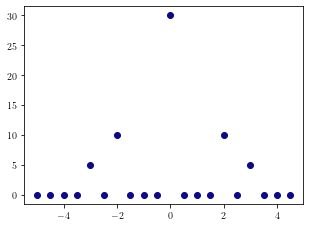

In [24]:
ff = np.fft.fftfreq(N, d=dt)

plt.figure(figsize=(5, 8))
plt.subplot(211)
plt.plot(ff, np.abs(XX), 'o')

`begin fft_timing`

In [25]:
xx_rand = np.random.rand(1000)
#!%timeit np.fft.fft(xx_rand)
print("50.7 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops\neach)") #!

50.7 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops
each)


In [26]:
#!%timeit my_dft(xx_rand)
print("198 ms ± 45.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)") #!

198 ms ± 45.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


`end`

`begin fftfreq`

In [27]:
# Berechne Frequenzstützpunkte der äquivalenten Fourier-Trafo
ff = np.fft.fftfreq(N, d=dt)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,
       -5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5])

`end`

`begin fftshift`

In [28]:
# Bei Plots mit durchgezogenen Linien muss x-Achse monoton
# wachsen. Hilfsfunktion verschiebt Nullfrequenz in die Mitte
ff_shift = np.fft.fftshift(ff)

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,
        0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [29]:
XX_shift = np.fft.fftshift(XX)
#print("array([-3.88578059e-16+1.55673109e-14j,  1.05609965e-14+1.25455202e-14j,\n       ...\n        3.00000000e+01+0.00000000e+00j,  2.22044605e-15-3.59434704e-15j,\n       ...\n        1.05471187e-14-1.18724475e-14j, -5.96744876e-16-1.23755173e-14j])") #!
print("array([-3.88578059e-16+1.55673109e-14j,\n       ...\n       -5.96744876e-16-1.23755173e-14j])") #!

array([-3.88578059e-16+1.55673109e-14j,
       ...
       -5.96744876e-16-1.23755173e-14j])


`end`

`begin plot_spectrum`

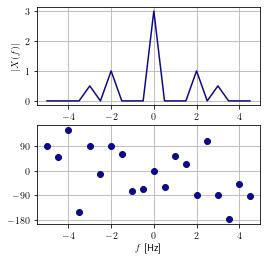

In [50]:
plt.figure(figsize=(4, 4))#!
plt.subplot(211)
plt.plot(ff_shift, dt*np.abs(XX_shift))
plt.grid()
plt.ylabel("$|X(f)|$")

plt.subplot(212)
plt.plot(ff_shift, np.angle(XX_shift)/np.pi*180, 'o')
plt.yticks(range(-180, 180, 90))
plt.grid()
plt.xlabel("$f$ [Hz]")
show_book('plot_spectrum')#!

`end`

# Fourier-Analyse

## Erste Analyse

`begin load_audio`

In [31]:
import scipy.io.wavfile
# Lade Audiodatei
# rate=Sampling-Frequenz in Hz, data_int=1D-Array von int's
rate, data_int = scipy.io.wavfile.read('example_piano.wav')
# Für Fourier-Trafo braucht man float's, Skalierung auf [-1, 1]
data = np.array(data_int, dtype=float) / 2**15
# Zeitvektor
ts = np.arange(len(data))/rate
pass #!

`end`

/home/ck2/miniconda3/envs/base38/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


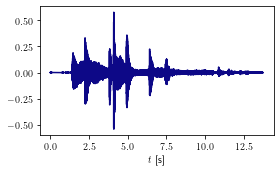

In [32]:
import scipy.signal
audio_envelope = scipy.signal.hilbert(data)
plt.figure(figsize=(4, 2.5))
plt.plot(ts, audio_envelope)
plt.xlabel('$t$ [s]')
plt.tight_layout()
show_book('audio_envelope')

`begin extract_snippet`

In [33]:
# In diesem Zeitbereich sind zwei Töne zu hören
snip_start = int(2.3 * rate)  # 2.3 s
snip_end = int(3.3 * rate)    # 3.3 s
two_notes_audio = data[snip_start:snip_end]
N_samples = len(two_notes_audio)
pass #!

`end`

`begin manual_periodogram`

In [34]:
snip_fft = np.fft.fft(two_notes_audio)
# Multiplikation mit konjugiert-komplexem Spektrum
# liefert Quadrat der Amplitude
# Skalierungsfaktor sorgt dafür, dass Integral über gesamtes
# Frequenzspektrum auch die Gesamtleistung des Signals liefert
snip_power_spec = snip_fft * np.conj(snip_fft) / (rate*N_samples)
# Werte sind "eigentlich" schon reell, um numerische Artefakte
# zu beseitigen, wird trotzdem nochmal nur der Realteil genommen
snip_power_spec = np.real(snip_power_spec)
# Dazu passender Frequenzvektor
ff = np.fft.fftfreq(len(snip_power_spec), 1/rate)
# Wir wollen nur die "rechte Seite" des Spektrums
i_max = int(N_samples/2) + 1
ff, snip_power_spec = ff[:i_max], snip_power_spec[:i_max]

`end`

`begin plot_periodogram`

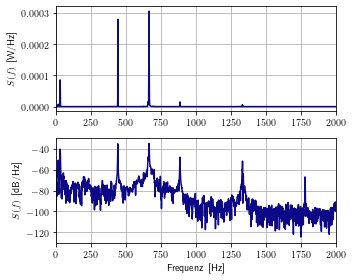

In [35]:
#%matplotlib ipympl #!
plt.figure(figsize=(5, 4))#!
ax1 = plt.subplot(211)
plt.plot(ff, snip_power_spec)
plt.grid() #!
plt.ylabel('$S(f)$ [W/Hz]')#!
#_
plt.subplot(212, sharex=ax1)
plt.plot(ff, 10*np.log10(snip_power_spec))
plt.grid() #!
plt.xlim(0, 2000) #!
plt.ylim(-130, -30) #!
plt.xlabel('Frequenz [Hz]')#!
plt.ylabel('$S(f)$ [dB/Hz]')#!
plt.tight_layout() #!
show_book('manual_spectrum') #!

`end`

`begin periodogram_scipy`

In [36]:
import scipy.signal
ff, snip_power_spec = scipy.signal.periodogram(two_notes_audio,
                                               fs=rate)

`end`

## Fenstern

`begin truncated_sine`

In [37]:
Fs = 20
ts = np.arange(0, 4.25, 1/Fs)
ys = np.sin(2*np.pi*ts)
N = len(ts)
pass #!

`end`

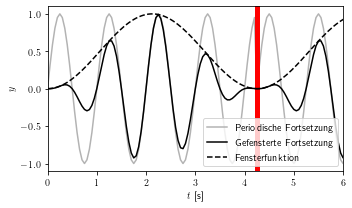

In [38]:
plt.figure(figsize=(5, 3))
plt.plot(np.hstack([ts, ts+4.25]), np.hstack([ys, ys]), c=(0.7, 0.7, 0.7), label="Periodische Fortsetzung")
plt.axvline(4.25, color='red', lw=5)

window_ys = scipy.signal.get_window('hann', N)
plt.plot(np.hstack([ts, ts+4.25]), np.hstack([ys*window_ys, ys*window_ys]), c="black", label="Gefensterte Fortsetzung")
plt.plot(np.hstack([ts, ts+4.25]), np.hstack([window_ys, window_ys]), c="black", ls="--", label="Fensterfunktion")

plt.xlim(0, 6)
plt.xlabel("$t$ [s]")
plt.ylabel("$y$")
plt.legend()
plt.tight_layout()
show_book('window_reason')

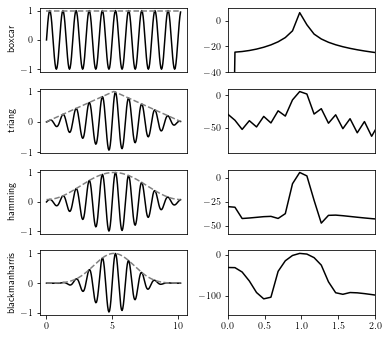

In [39]:
window_names = ['boxcar', 'triang', 'hamming', 'blackmanharris']
rows = len(window_names)

Fs = 20
ts = np.arange(0, 10.25, 1/Fs)
ys = np.sin(2*np.pi*ts)
N = len(ts)

plt.figure(figsize=(5.5, 4.8))
for i, window_name in enumerate(window_names):
    ax1 = plt.subplot(rows, 2, 2*i + 1)

    window_ys = scipy.signal.get_window(window_name, N)
    plt.plot(ts, ys*window_ys, c="k")
    plt.plot(ts, window_ys, c="grey", ls="--")
    plt.ylabel(window_name)
    
    ax2 = plt.subplot(rows, 2, 2*i + 2)
    
    #ff, Pxx = scipy.signal.periodogram(window_ys, fs=Fs)
    #plt.plot(ff, 10*np.log10(Pxx))
    
    ff, Pxx = scipy.signal.periodogram(ys, fs=Fs, window=window_name)
    plt.plot(ff, 10*np.log10(Pxx), c="k")
    
    plt.xlim(0, 2)
    if i == 0:
        plt.ylim(-40, 10)
        
    if i < len(window_names) - 1:
        ax1.set_xticks([])
        ax1.set_xticklabels([])
        ax2.set_xticks([])
        ax2.set_xticklabels([])

plt.tight_layout()
show_book("window_function_zoo")

## Welch

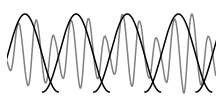

In [40]:
plt.figure(figsize=(3.2,1.6))
overlap = 60
window_size = 256
width = 800

plt.plot(two_notes_audio[0:800], c="grey")

for i in range(-overlap, width, window_size-overlap):
    snip_ts = np.arange(i, i+window_size)
    plt.plot(snip_ts, 0.5*scipy.signal.get_window('hann', window_size)-0.25, c='k')
    #plt.plot(snip_ts, scipy.signal.get_window('hann', window_size)*two_notes_audio[0:1200][snip_ts], c='grey')

plt.xlim(0, width)
plt.ylim(-0.3, 0.3)
plt.axis('off')
plt.tight_layout()

show_book("overlapping_windows")

`begin welch_manual`

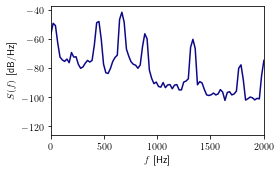

In [41]:
N = len(two_notes_audio)
# Länge jedes Fensters
snippet_length = 2048
# Überlappung
overlap = 128
# Anzahl von Ausschnitten, die ins Gesamtsignal passen
n_snippets = int((N - overlap)/(snippet_length - overlap))
# Fensterfunktion
window_name = 'hann'
# Array für Periodogramm allokieren
# Da uns nur die rechte Seite des Spektrums interessiert, haben
# wir im Frequenzbereich nur halb so viele Samples
averaged_periodogram = np.zeros(int(snippet_length/2)+1)

for snippet_start in range(0, N - snippet_length + 1,
                           snippet_length - overlap):
    snippet_data = two_notes_audio[snippet_start:
                                  (snippet_start+snippet_length)]
    ff, snippet_periodogram = scipy.signal.periodogram(
        snippet_data, fs=rate, window=window_name)
    averaged_periodogram += snippet_periodogram / n_snippets

plt.figure(figsize=(4, 2.5))#!
plt.plot(ff, 10*np.log10(averaged_periodogram))
plt.xlim(0, 2000)
plt.xlabel('$f$ [Hz]')
plt.ylabel('$S(f)$ [dB/Hz]')
plt.tight_layout() #!
show_book('welch_manual') #!

`end`

`begin welch_scipy`

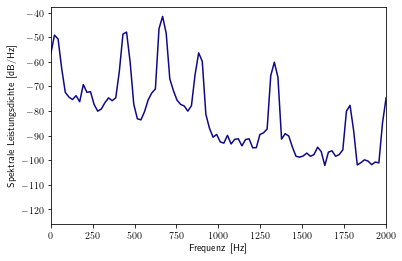

In [42]:
ff, averaged_periodogram = scipy.signal.welch(two_notes_audio,
  fs=rate, window='hann', nperseg=2048, noverlap=128)
plt.figure() #!
plt.plot(ff, 10*np.log10(averaged_periodogram)) #!
plt.xlim(0, 2000) #!
plt.xlabel('Frequenz [Hz]') #!
plt.ylabel('Spektrale Leistungsdichte [dB/Hz]') #!
pass #!

`end`

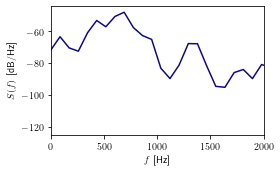

In [43]:
ff, averaged_periodogram = scipy.signal.welch(two_notes_audio, fs=rate, window='hann', nperseg=512, noverlap=32)
plt.figure(figsize=(4, 2.5))#!
plt.plot(ff, 10*np.log10(averaged_periodogram)) #!
plt.xlim(0, 2000) #!
plt.xlabel('$f$ [Hz]')
plt.ylabel('$S(f)$ [dB/Hz]')
plt.tight_layout()
show_book('welch_512') #!
pass #!

## Spektogramme

In [44]:
octave_freqs = 440*2.0**np.arange(-4, 4)

array([  27.5,   55. ,  110. ,  220. ,  440. ,  880. , 1760. ,
       3520. ])

`begin spectrogram_scipy`

In [45]:
# Berechne Spektrogramm, Daten werden als Matrix gespeichert
ff, tt, spectrogram = scipy.signal.spectrogram(
    data, fs=rate, window='hann', nperseg=4096)
# Erste Zeile entspricht niedrigster Frequenz, für Visualisierung
# muss Matrix vertikal gedreht werden
spectrogram = np.flipud(spectrogram)
pass #!

`end`

`begin spectrogram_plot`

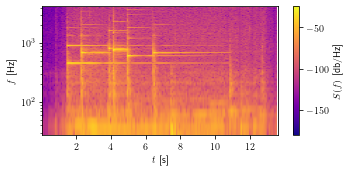

In [46]:
plt.figure(figsize=(5, 2.5))
# Definiere Bereich, auf den Matrix gezeichnet wird. Dadurch
# werden auch die Achsen gleich richtig beschriftet
# xmin, xmax, ymin, ymax
extent = tt[0], tt[-1], ff[0], ff[-1]
plt.imshow(10*np.log10(spectrogram), extent=extent, cmap="plasma")#!
#!plt.imshow(10*np.log10(spectrogram), extent=extent)
# Skaliere Achsen, um Abbildung zu füllen
plt.axis('auto')
# Logarithmische Frequenzskalierung entspricht Tonempfinden
plt.yscale('log')
plt.ylim(27.5, 4186)  # Bandbreite eines Klaviers
plt.xlabel('$t$ [s]')
plt.ylabel('$f$ [Hz]')
# Erstelle und beschrifte Farbskala
cbar = plt.colorbar()
cbar.ax.set_ylabel('$S(f)$ [db/Hz]')
plt.tight_layout()#!
show_book('spectrogram') #!

`end`

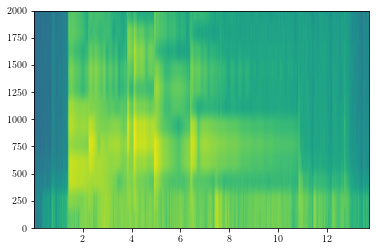

In [47]:
plt.figure()
plt.specgram(data, Fs=rate)
plt.ylim(0, 2000)
plt.show()

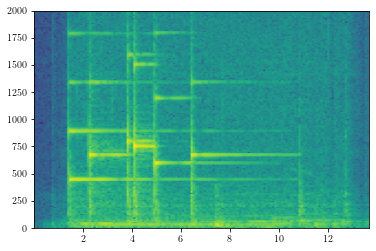

In [48]:
plt.figure()
plt.specgram(data, Fs=rate, NFFT=4096)
plt.ylim(0, 2000)
plt.show()